###**Import Libraries**

In [45]:
import os, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

###**Load Dataset**

In [46]:
csv_path = "/content/COVID clinical trials.csv"

In [47]:
df = pd.read_csv(csv_path)
print("Shape:", df.shape)
display(df.head(3))

Shape: (5783, 27)


,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482


In [48]:
print("\nInfo:")
display(df.info())
print("\nNumerical describe:")
display(df.describe())
print("\nCategorical describe:")
display(df.describe(include="object"))


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys       

None


Numerical describe:


,Rank,Enrollment
count,5783.000000,5.749000e+03
mean,2892.000000,1.831949e+04
std,1669.552635,4.045437e+05
min,1.000000,0.000000e+00
25%,1446.500000,6.000000e+01
50%,2892.000000,1.700000e+02
75%,4337.500000,5.600000e+02
max,5783.000000,2.000000e+07



Categorical describe:


,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
count,5783,5783,2480,5783,5783,5783,4897,5748,5783,5773,...,5782,5749,5747,5747,5783,36,5783,5198,182,5783
unique,5783,5775,2338,12,2,3067,4337,5687,3631,3,...,5734,654,877,978,438,33,269,4255,182,5783
top,NCT04680000,Acalabrutinib Study With Best Supportive Care ...,COVID-19,Recruiting,No Results Available,COVID-19,Other: No intervention,Mortality,Assistance Publique - Hôpitaux de Paris,All,...,COVID-19,"May 1, 2020","December 31, 2020","December 31, 2021","April 24, 2020","November 4, 2020","April 8, 2021","Uhmontpellier, Montpellier, France","""Statistical Analysis Plan"", https://ClinicalT...",https://ClinicalTrials.gov/show/NCT04680000
freq,1,2,47,2805,5747,720,32,5,78,5567,...,6,113,122,179,108,2,109,19,1,1


###**Data Cleaning**


% Missing (top 15):


,0
Results First Posted,99.377486
Study Documents,96.852845
Acronym,57.115684
Phases,42.555767
Interventions,15.320768
Locations,10.115857
Primary Completion Date,0.622514
Completion Date,0.622514
Study Designs,0.605222
Outcome Measures,0.605222


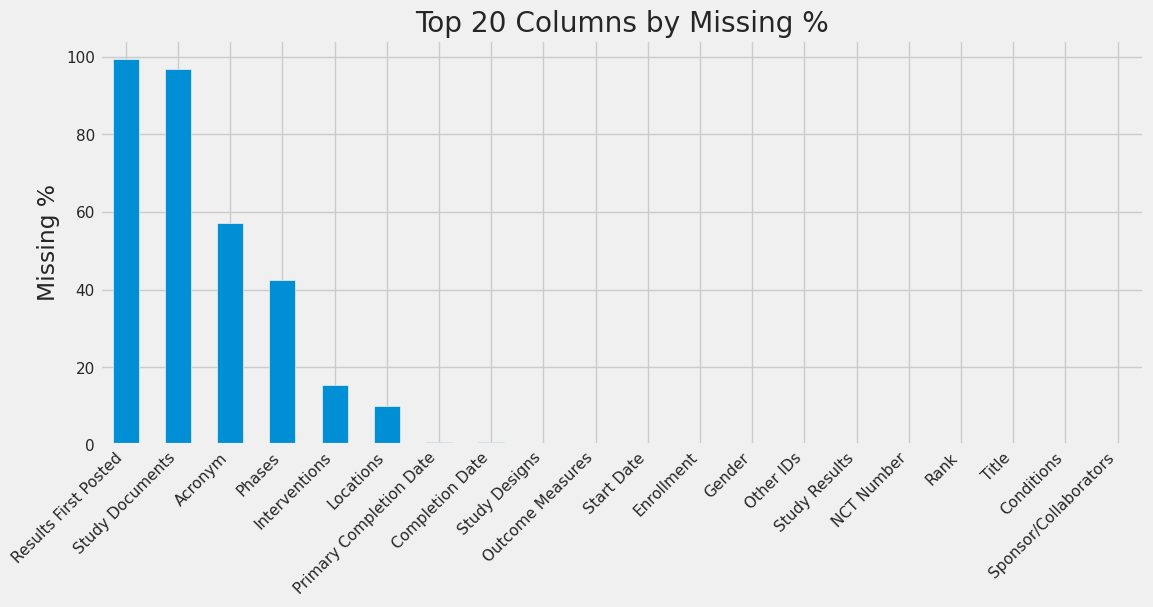

In [49]:
na_pct = df.isna().mean().sort_values(ascending=False)*100
print("\n% Missing (top 15):")
display(na_pct.head(15))

# quick bar for missingness
plt.figure(figsize=(12,5))
na_pct.head(20).plot(kind="bar")
plt.ylabel("Missing %")
plt.title("Top 20 Columns by Missing %")
plt.xticks(rotation=45, ha="right")
plt.show()

**Observations:**


* Results First Posted (99.38%) and Study Documents (96.85%) were nearly empty and dropped.  

*  Acronym and Phases columns had >40% missing, but retained since they are relevant and partially usable.

*  Other columns like Interventions, Outcome Measures, Locations, etc., had smaller missing percentages.

In [50]:
very_sparse_cols = [c for c in df.columns if df[c].isna().mean() > 0.90]
keep_anyway = set()
drop_cols = [c for c in very_sparse_cols if c not in keep_anyway]
print("\nDropping very sparse columns:", drop_cols)
df = df.drop(columns=drop_cols, errors="ignore")
before = df.shape
df = df.drop_duplicates()
after = df.shape
print(f"Deduplicated: {before} -> {after}")
df.columns = [c.strip() for c in df.columns]


Dropping very sparse columns: ['Results First Posted', 'Study Documents']
Deduplicated: (5783, 25) -> (5783, 25)


**Impute values**

In [51]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
num_cols = df.select_dtypes(exclude="object").columns.tolist()

for c in cat_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(f"Missing {c}")


for c in num_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].median())

print("\nRemaining missing % (should be ~0 now):")
display((df.isna().mean()*100).sort_values(ascending=False).head(10))


Remaining missing % (should be ~0 now):


,0
Rank,0.0
NCT Number,0.0
Title,0.0
Acronym,0.0
Status,0.0
Study Results,0.0
Conditions,0.0
Interventions,0.0
Outcome Measures,0.0
Sponsor/Collaborators,0.0


* Dropped: 'Results First Posted', 'Study Documents' due to extreme sparsity.  

*  Imputed categorical values with "Missing " to preserve category count integrity.
*   Imputed numeric 'Enrollment' using the median (170) due to strong right skew.



###**Feature Engineering**

In [52]:
if 'Locations' in df.columns and 'Country' not in df.columns:
    df['Country'] = df['Locations'].apply(lambda x: str(x).split(',')[-1].strip() if pd.notna(x) else 'Missing Locations')

if 'Start Date' in df.columns:
    df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')




*  Parsed date columns like 'Start Date' into datetime objects.
*  Extracted 'Country' from the 'Locations' column.
*   Dropped duplicates — the dataset remained the same, indicating no duplicates.






**Univariate Plot: Status**

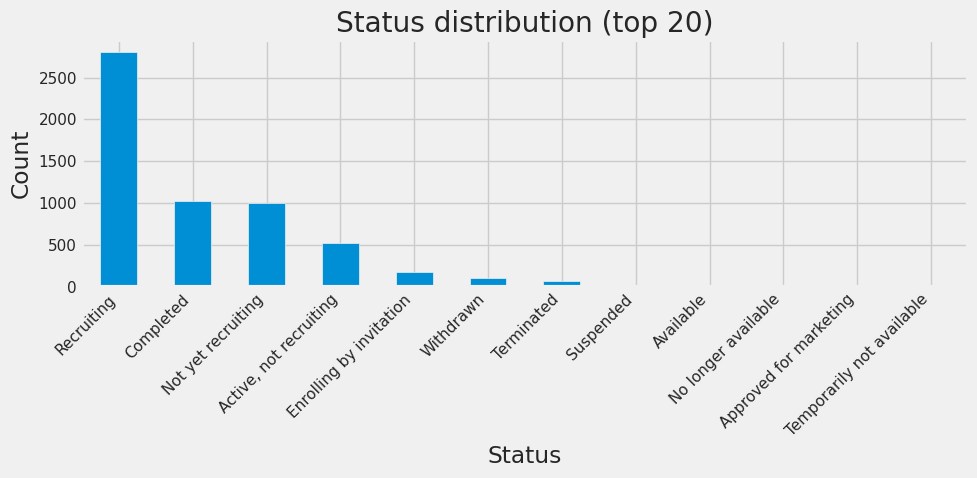

In [53]:
plt.figure(figsize=(10,5))
df['Status'].value_counts().head(20).plot(kind='bar')
plt.title('Status distribution (top 20)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Observations:**


*  Recruiting (2,805) is the most common status.

*  Followed by Completed (1,025) and Not yet recruiting (1,004).
*  Small counts in Terminated, Withdrawn, and Suspended.

*  **Insight:** Most COVID-19 trials were still in progress when data was collected.



**Univariate Plot: Phase**

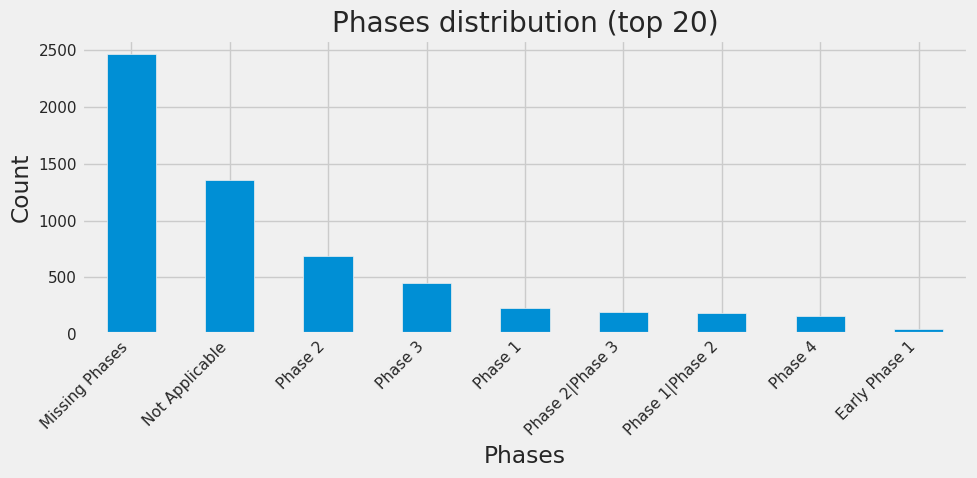

In [31]:
plt.figure(figsize=(10,5))
df['Phases'].value_counts().head(20).plot(kind='bar')
plt.title('Phases distribution (top 20)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



*  Missing Phases and Not Applicable dominate (~4,000 trials combined).

* Actual drug development phases (1–4) exist but are fewer.  
* **Insight:** Many studies are observational, non-interventional, or diagnostics-focused.


**Univariate Plot: Age**

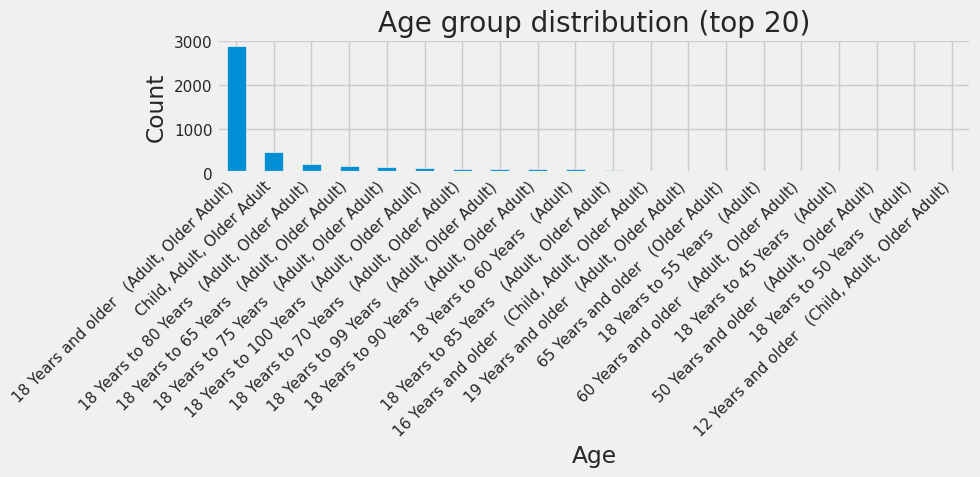

In [32]:
plt.figure(figsize=(10,5))
df['Age'].value_counts().head(20).plot(kind='bar')
plt.title('Age group distribution (top 20)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Observations:**

* The largest group is "18 Years and older (Adult, Older Adult)".
* Some include children (e.g., "Child, Adult, Older Adult"), but limited.   
*   Insight: The majority of trials target adults, not pediatric populations.




**Univariate plot: Gender**

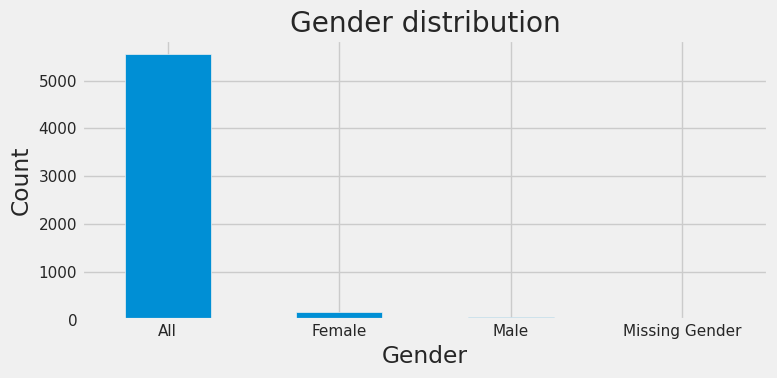

In [33]:
plt.figure(figsize=(8,4))
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Observations:**

* Over 5,500 studies accept All genders.
* Very few are gender-specific: Female-only (162), Male-only (44).
* Insight: COVID trials are designed to be gender-inclusive.



**Univariate plot: Country**

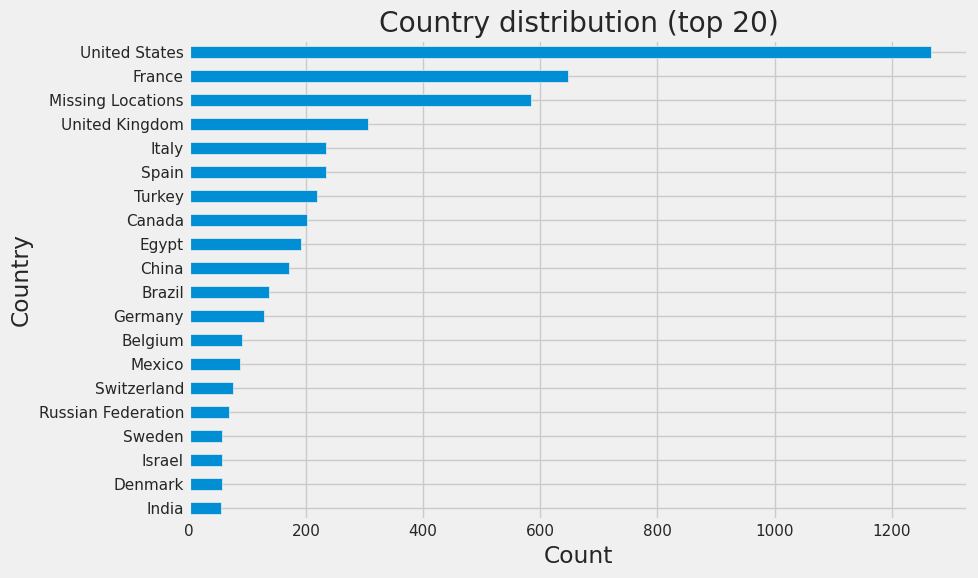

In [34]:
plt.figure(figsize=(10,6))
df['Country'].value_counts().head(20).sort_values().plot(kind='barh')
plt.title('Country distribution (top 20)')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


**Observations:**


*  United States leads with 1,267 trials, followed by France (647) and UK (306).
*  Missing Locations appears 3rd — around 10% of rows.
* Insight: Western nations and developed healthcare systems are highly represented.   


**Enrollment: Histogram**

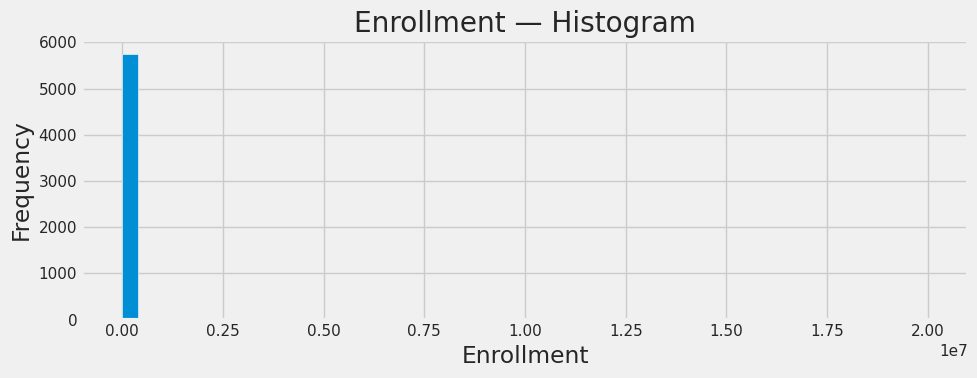

In [54]:
plt.figure(figsize=(10,4))
df['Enrollment'].plot(kind='hist', bins=50)
plt.title('Enrollment — Histogram')
plt.xlabel('Enrollment')
plt.tight_layout()
plt.show()

**Observations:**

*  Histogram shows extreme right-skew — most trials have <1,000 participant



**Enrollment: Boxplot**

Boxplot of Enrollment to visualize outliers.

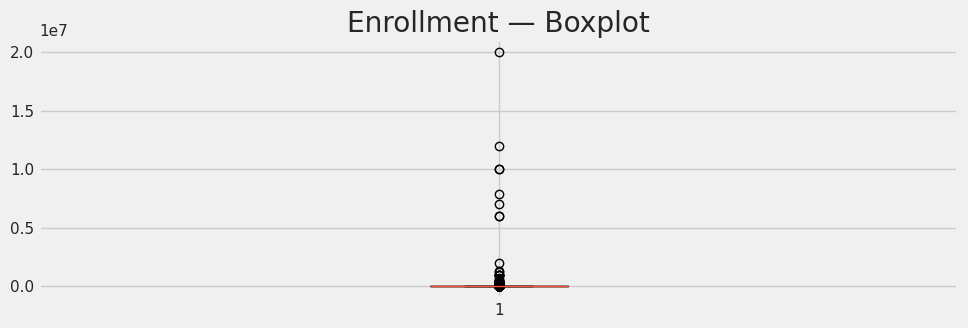

In [36]:
plt.figure(figsize=(10,3.5))
plt.boxplot(df['Enrollment'].dropna().values, vert=True)
plt.title('Enrollment — Boxplot')
plt.tight_layout()
plt.show()


**Observations:**


* Boxplot reveals strong outliers (e.g., 20 million entries).

* Median enrollment is 170; mean is misleading due to skew (18,319).  

* **Insight:** Always report median for central tendency on such skewed data.  


**Bivariate: Country × Status**

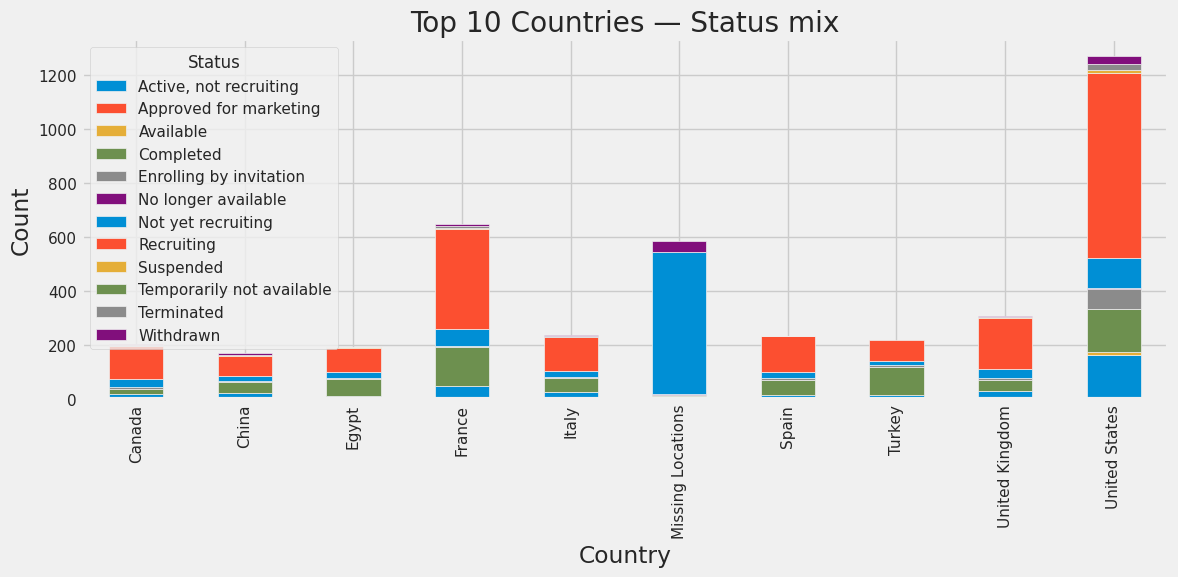

In [37]:
top_countries = df['Country'].value_counts().head(10).index
sub = df[df['Country'].isin(top_countries)]
ct2 = pd.crosstab(sub['Country'], sub['Status'])
plt.figure(figsize=(12,6))
ct2.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Top 10 Countries — Status mix')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


**Observations:**

*  USA and France show the most balanced mix of statuses.

* Some countries have a high number of Recruiting studies.
  
*  **Insight:** High-volume countries are conducting a variety of trial types and phases.


**Time series: Trials started by month**

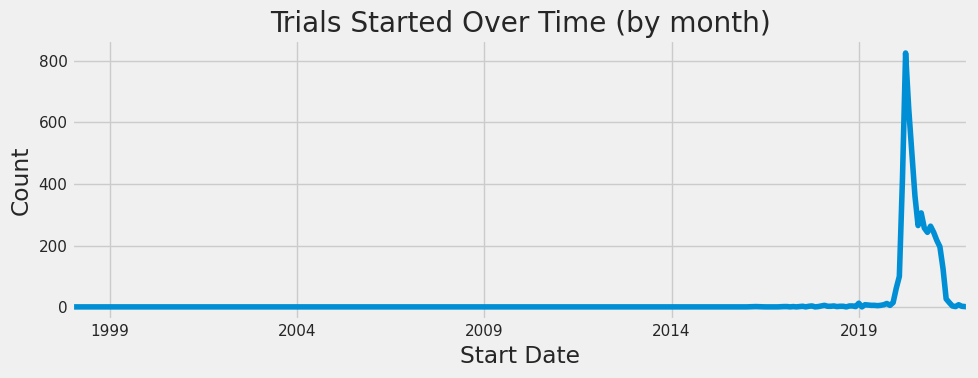

In [55]:
if "Start Date" in df.columns:
    starts = df["Start Date"].dropna().dt.to_period("M").value_counts().sort_index()
    if not starts.empty:
        plt.figure(figsize=(10,4))
        starts.plot(kind="line")
        plt.title("Trials Started Over Time (by month)")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

**Observations:**

* Steep rise in new trials starting around March–April 2020.
* Peak activity around mid-2020 to early 2021  
* Insight: Start dates clearly align with the global escalation of COVID-19.    


In [56]:
out_path = "/content/COVID_clinical_trials_cleaned.csv"
df.to_csv(out_path, index=False)
print("\nSaved cleaned dataset to:", out_path)



Saved cleaned dataset to: /content/COVID_clinical_trials_cleaned.csv


###**Headline Insights**

In [44]:
insights = []

if "Status" in df.columns:
    top_status = df["Status"].value_counts().head(3)
    insights.append(f"Top statuses:\n{top_status.to_string()}")

if "Phases" in df.columns:
    top_phases = df["Phases"].value_counts().head(3)
    insights.append(f"Top phases:\n{top_phases.to_string()}")

if "Country" in df.columns:
    top_c = df["Country"].value_counts().head(5)
    insights.append(f"Top countries by trial count:\n{top_c.to_string()}")

if "Enrollment" in df.columns:
    insights.append(f"Enrollment — median={df['Enrollment'].median():,.0f}, mean={df['Enrollment'].mean():,.0f}")

if "Start Date" in df.columns and not df["Start Date"].dropna().empty:
    span = (df["Start Date"].min(), df["Start Date"].max())
    insights.append(f"Start Date range: {span[0].date()} → {span[1].date()}")

print("\n--- Quick Insights ---")
print("\n\n".join(insights) if insights else "Run produced plots; see visuals above.")


--- Quick Insights ---
Top statuses:
Status
Recruiting            2805
Completed             1025
Not yet recruiting    1004

Top phases:
Phases
Missing Phases    2461
Not Applicable    1354
Phase 2            685

Top countries by trial count:
Country
United States        1267
France                647
Missing Locations     585
United Kingdom        306
Italy                 235

Enrollment — median=170, mean=18,213

Start Date range: 1998-01-01 → 2021-12-01
